In [41]:
"""
    ESTILOS DE INTERFAZ:
    
    Matplotlib presenta dos tipos de interfaces:
        *Nativa, Orientada a objetos
        *Pylab o MATLAB-style interface
    
    
    La interfaz nativa integra 2 componentes principales:
        *matplotlib.figure: El linezo contenedor donde se situan el resto de elementos.
        *matplotlib.axes.Axes: Los ejes donde se situan el resto de elementos.
    .figure contiene .axes.Axes (uno o muchos) y .axes.Axes contiene los elementos.
    
    Esta interfaz tiene incluso variantes, en INCOMPATIBILIDAD DE INTERFACES Y LEYENDA
    hay una y en el notebook Matplotlib II.ipynb se muestra una de ellas.
    
    Comúnmente, en la creación de gráficos. Se va completando con las propiedades 
    de los objetos 'Axes'. Lo bueno que seas con matplotlib depende de las
    funciones/propiedades que sepas usar. 
    
    
    La MATLAB-style interface fue creada porque los usuarios de matplotlib usaban
    también matlab. Los objetos 'figure' y 'axes' son gestionados automáticamente
    y con plt.gcf()(get current figure) y plt.gca() (get current axes) se puede 
    acceder a esos objetos ahora ocultos. Esta forma solo es adecuada para 
    gráficos únicos y simples.
    
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# INTERFAZ ORIENTADA A OBJETOS.


# Necesario para los notebooks de jupyter
%matplotlib inline  
plt.style.use('seaborn-whitegrid')  # Estilo distinto, print(plt.style.available)

# Crea el contenedor
fig = plt.figure(figsize=(10, 15))


# Genera los 'Axes' vacíos al contenedor 'figure' con .add_subplot(filas,cols,pos).
# La pos es izq,der,arr,ab (cómo la dirección de lectura común occidental)
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,6) # Podemos situarlos donde queramos en esa 'rejilla'

# Define los valores de las lineas como un TOY
# Los 'Axes' se adecúan a ellos automáticamente.
x_values = [1,2,3,4,5]
y_values = [0,5,10,15,20]

# Configurar los 'Axes' con títulos, colores, leyendas, etc.           
ax1.plot(x_values, y_values, color='red', label='plot 1')  # línea 1
ax1.plot(y_values, x_values, color='blue', label='plot 2')  # línea 2
ax1.legend(loc='upper left')
ax1.set_title("Title for Axes 1")
ax1.set_xlabel("Axes 1  X-Label")
ax1.set_ylabel("Axes 1 Y-Label")

ax2.plot(x_values, y_values, color='orange', label='plot 1')
ax2.legend(loc='upper right')
ax2.set_title("Title for Axes 2")

ax3.plot(x_values, y_values, color='green', label='plot 1')
ax3.legend(loc='upper left')

ax4.plot(x_values, y_values, color='blue', label='plot 1')

ax5.plot(x_values, y_values, color='violet', label='plot 1')
ax5.legend(loc='upper right')

# Add a title to the figure and then show the plot
fig.tight_layout(pad=3.0)  # Queremos espacio entre las gráficas
fig.suptitle("This is a Figure Title")
plt.show()


print() # ·····················································································SEPARACIÓN
# INTERFAZ ESTILO MATLAB

 
path = '/home/javi/PycharmProjects/Apuntes/time_series/data/raw/SP500.csv'
data = pd.read_csv(path, 
                   dtype={'SP500': np.float64}, 
                   na_values=".", 
                   parse_dates=True,
                   header=0,
                   index_col=0,
                   infer_datetime_format=True
                  ).dropna()

plt.figure(figsize=(20, 10))

# Es como si dentro de .plt estuvieran .figure y .axes
plt.plot(data.index, data['SP500'])       # Como generar un .figure

plt.xlabel("Year")                        # Como editar los 'Axes'
plt.xticks(rotation=45)

# Genera valores sintéticos para que no se amontonen. Prueba plt.yticks(data['SP500'])  
yticks = np.linspace(data['SP500'].min(), data['SP500'].max(), 12)  
plt.yticks(yticks)  
plt.ylabel("S&P 500 Price")

plt.title("S&P 500 Price History")
plt.show() 

FileNotFoundError: [Errno 2] File /home/javi/PycharmProjects/Apuntes/time_series/data/raw/SP500.csv does not exist: '/home/javi/PycharmProjects/Apuntes/time_series/data/raw/SP500.csv'

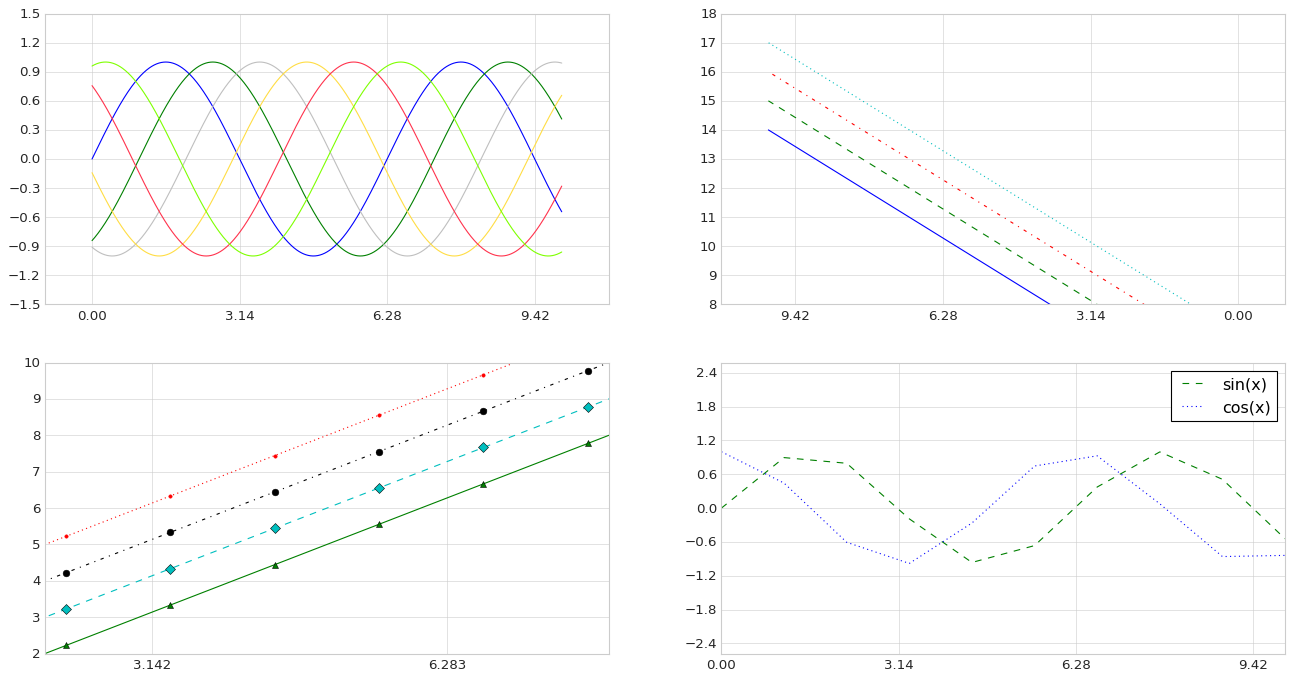

In [47]:
"""
    EDITAR PROPIEDADES I (cosas básicas):
    
    En las referencias lo explican estilo matlab.
    Yo lo hago estilo orientado a objetos.
    
    Las propiedades son como un estado, se especifican 
    para siempre si no se cambia su valor.
    
    Ajuste de parámetros
        1. Color
        2. Marcas
        3. Límites de los ejes
        4. Etiquetas (labels)
        5. Ticks
"""
plt.style.use('seaborn-whitegrid')  # Estilo distinto, print(plt.style.available)

x = np.linspace(0, 10, 1000)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Se aceptan multitud de formatos de colores
ax1.plot(x, np.sin(x - 0), color='blue')        # por nombre
ax1.plot(x, np.sin(x - 1), color='g')           # por "rgbcmyk"
ax1.plot(x, np.sin(x - 2), color='0.75')        # Escala de gris entre 0 y 1
ax1.plot(x, np.sin(x - 3), color='#FFDD44')     # Hexadecimal
ax1.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB
ax1.plot(x, np.sin(x - 5), color='chartreuse'); # colores HTML
ax1.set_xlim(-1, 11)                            # CUIDADO! xlim en matlab-style
ax1.set_ylim(-1.5, 1.5)                         # CUIDADO! ylim en matlab-style

# Se pueden abreviar los estilos. Cuidado! colores y 
# máquina de estados, afectado por color chartreuse
# Prueba a cambiar el color.
ax2.plot(x, x + 4, linestyle='-')  # linestyle='solid'
ax2.plot(x, x + 5, linestyle='--') # linestyle='dashed'
ax2.plot(x, x + 6, linestyle='-.') # linestyle='dashdot'
ax2.plot(x, x + 7, linestyle=':')  # linestyle='dotted'
ax2.set_xlim(11, -1)               # Puedes verlo con ejes del revés
ax2.set_ylim(8, 18)
 
x = np.linspace(0, 10, 10) # Para no ver 1000 marcas apilonadas

# Incluso se pueden mezclar estilos y colores abreviados
# Esta combianción obedece a '[marker][line][color]'
ax3.plot(x, x + 0, '^-g')          # solid green
ax3.plot(x, x + 1, 'D--c')         # dashed cyan
ax3.plot(x, x + 2, 'o-.k')         # dashdot black
ax3.plot(x, x + 3, '.:r');         # dotted red
ax3.axis([2, 8, 2, 10])      # Aplicas los límites con una lista 
# con .axis('equal') X e Y están igual de espaciados
# OJO!: axis != Axes 

plt.style.use('classic')  # Estilo distinto, print(plt.style.available)
ax4.plot(x, np.sin(x), '--g', label='sin(x)')
ax4.plot(x, np.cos(x), ':b', label='cos(x)')
ax4.axis('equal')
ax4.legend();

ax = fig.axes  # por no hacer fig, ax = plt.subplots(...
for axi in ax:
    axi.grid(True)
    axi.xaxis.set_major_locator(plt.MaxNLocator(10))
    axi.yaxis.set_major_locator(plt.MaxNLocator(10))

    # Xticks multiplos de PI
    axi.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2)) # cada medio PI
    axi.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
    
    # Opciones de formateo de ticks más complejas
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html#Summary-of-Formatters-and-Locators
    # Caso útil es formatear las fechas de una serie temporal al gusto
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
plt.show()

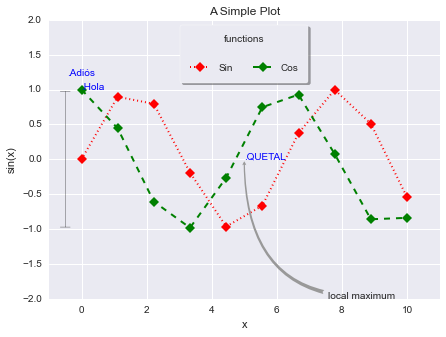

AxesSubplot(0.125,0.125;0.775x0.775)


In [103]:
"""

    INCOMPATIBILIDAD DE INTERFACES 
    + LEYENDA
    + ANOTACIONES:

    En la celda anterior ya ha habido un "CUIDADO! xlim en matlab-style"
    Muchos métodos de plt se traducen igual a ex EXCEPTO para los
    límites, títulos y etiquetas(labels):
        plt.xlabel() → ax.set_xlabel()
        plt.ylabel() → ax.set_ylabel()
        plt.xlim() → ax.set_xlim()
        plt.ylim() → ax.set_ylim()
        plt.title() → ax.set_title()
        
    Para evitar este mal de cabeza se recomienda usar ax.set() en la interfaz 
    orientada a objetos para definir estas 5 características.
    
    Aquí se exploran las opciones de la leyenda.
    
    Cuidado, el texto de las anotaciones está por defecto 
    up-left del punto de interés. Para las flechas se puede 
    usar plt.arrow() pero mejor plt.annotate() por la flexibilidad.
    
"""

%matplotlib inline

plt.style.use('seaborn')  # Estilo distinto, print(plt.style.available)

# Se puede crear figure y crear ax o solo crear ax, resulta un AxesSubplot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,1,1)
# ax = plt.axes()

ax.plot(x, 
        np.sin(x), 
        'D--c', 
        linewidth=2, 
        color='r', 
        linestyle=':',
        label='Sin')

ax.plot(x, 
        np.cos(x), 
        'D--c', 
        linewidth=2, 
        color='g', 
        linestyle='--',
        label='Cos')

ax.set(xlim=(-1, 11), 
       ylim=(-2, 2),
       xlabel='x', 
       ylabel='sin(x)',
       title='A Simple Plot')

ax.legend(loc='upper center',  # 'upper left'
          ncol=2,
          title='functions',
          labelspacing=2,
          frameon=True,        # Si False, las op de abajo no funcionan
          fancybox=True,
          framealpha=1, 
          shadow=True, 
          borderpad=1,
          scatterpoints=1)

style = dict(size=10, color='blue')
ax.text(0, 1, ".Hola", **style)
ax.text(0, 1.2, ".Adiós", ha='center', **style) # Centrado
# Pero si no quieres adivinar números:
ax.text(0.5, 0.5, ".QUETAL", transform=ax.transAxes, **style) # También: x.transData y fig.transFigure

#Flechas!
ax.annotate('local maximum',  
            xy=(0.5, 0.5), 
            xytext=(0.8, 0),
            ha='center',
            xycoords=ax.transAxes,  # Ojo, transform es xycoords
            # Estilos de flechas
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90")
           )

ax.annotate('', 
            xy=(-0.5, 1), 
            xytext=(-0.5, -1),
            xycoords=ax.transData,
            arrowprops={'arrowstyle': '|-|,widthA=0.5,widthB=0.5', })


plt.show()

print(ax)